<a href="https://colab.research.google.com/drive/1tnOvFNgXiLtktiSsltTr0s308LZSsEPJ">Abre este Jupyter en Google Colab</a>

# Linear Regression: Cost of a security incident


This exercise explains the basics of linear regression applied to a simple cybersecurity use case.


## Exercise Staement

The exercise involves predicting the cost of a security incident based on the number of affected devices. The data set is randomly generated.


### 0. Imports

In [6]:
# Library installs
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### 1. Generate A Dataset

In [7]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("The lngth of the dataset is:", len(X))

The lngth of the dataset is: 100


### 2. Visualization of the dataset

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

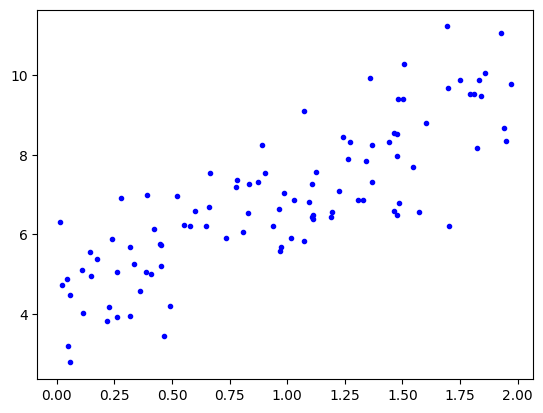

In [9]:
plt.plot(X, y, "b.")
plt.show()

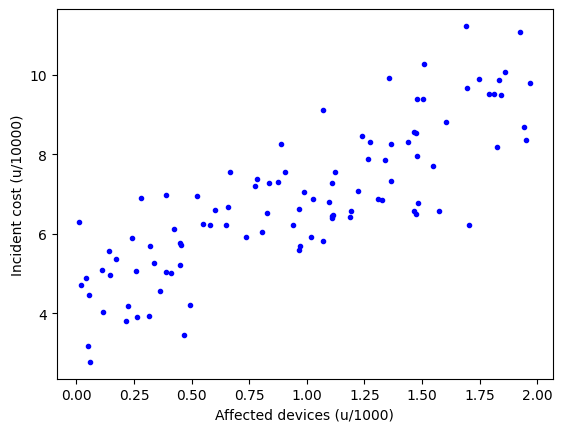

In [10]:
plt.plot(X, y, "b.")
plt.xlabel("Affected devices (u/1000)")
plt.ylabel("Incident cost (u/10000)")
plt.show()

### 3. Modification of th dataset


In [11]:
import pandas as pd

In [12]:
data = {'n_affected_devices': X.flatten(), 'cost': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_affected_devices,cost
0,1.357553,9.923457
1,1.834058,9.866775
2,0.453523,5.725512
3,1.464469,8.548889
4,0.239373,5.892478
5,0.466956,3.448190
6,1.811211,9.517028
7,0.522676,6.956136
8,0.904467,7.539859
9,0.658475,6.675886


In [13]:
# Escalado del número de equipos afectados
df['n_affected_devices'] = df['n_affected_devices'] * 1000
df['n_affected_devices'] = df['n_affected_devices'].astype('int')
# Escalado del coste
df['cost'] = df['cost'] * 10000
df['cost'] = df['cost'].astype('int')
df.head(10)

,n_affected_devices,cost
0,1357,99234
1,1834,98667
2,453,57255
3,1464,85488
4,239,58924
5,466,34481
6,1811,95170
7,522,69561
8,904,75398
9,658,66758


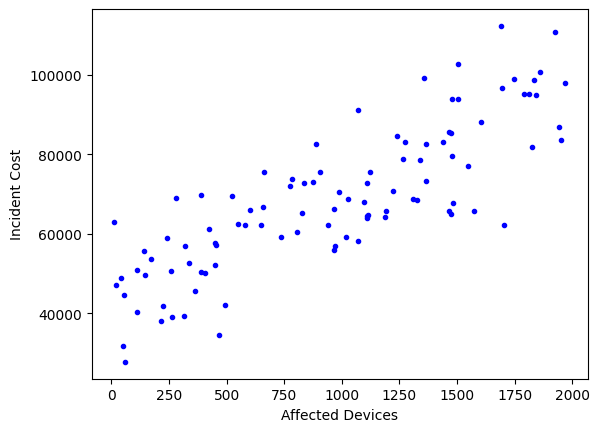

In [15]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_affected_devices'], df['cost'], "b.")
plt.xlabel("Affected Devices")
plt.ylabel("Incident Cost")
plt.show()

### 4. Model construction

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Model building and hypothesis function adjustment
lin_reg = LinearRegression()
lin_reg.fit(df['n_affected_devices'].values.reshape(-1, 1), df['cost'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Parámetro theta 0
lin_reg.intercept_

np.float64(43670.03483610263)

In [19]:
# Parámetro theta 1
lin_reg.coef_

array([26.14762141])

In [20]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_affected_devices"].min()], [df["n_affected_devices"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

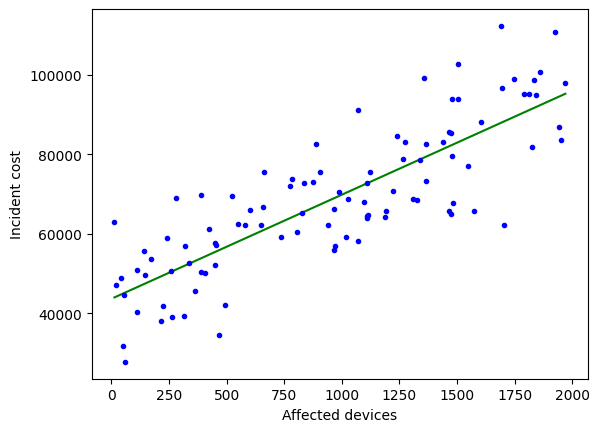

In [21]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_affected_devices'], df['cost'], "b.")
plt.xlabel("Affected devices")
plt.ylabel("Incident cost")
plt.show()

### 5. Predicting new examples

In [22]:
x_new = np.array([[1300]]) # 1300 affected devices

# Prediction of the cost that the incident would have
coste = lin_reg.predict(x_new) 

print("The incident cost would be:", int(coste[0]), "€")

The incident cost would be: 77661 €


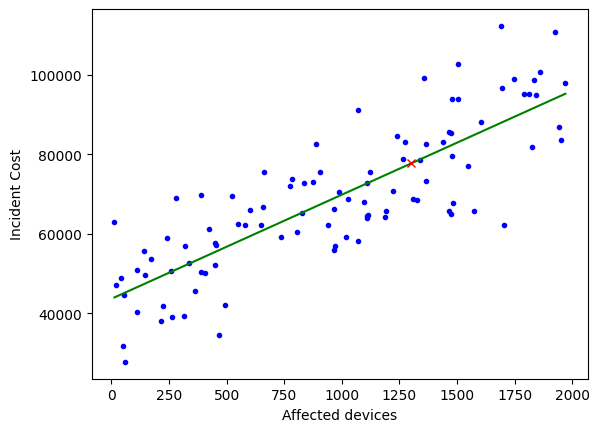

In [23]:
plt.plot(df['n_affected_devices'], df['cost'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Affected devices")
plt.ylabel("Incident Cost")
plt.show()